<a href="https://colab.research.google.com/github/chirag2saraiya/Session-9/blob/master/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


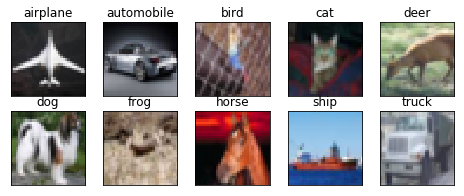

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu',input_shape=(32, 32, 3))) #  rec:(3x3)
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(64, 3, 3, activation='relu',border_mode='same')) #  rec:(5x5)
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(128, 3, 3, activation='relu',border_mode='same')) #  rec:(7x7)
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


#we add One Transition layer here i.e Maxpooling for extracting feature followed by 1x1 convolution for reducing Number of channels
model2.add(MaxPooling2D(pool_size=(2, 2))) # rec:(14x14)
model2.add(Convolution2D(32, 1, 1, activation='relu')) 
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(64, 3, 3, activation='relu',border_mode='same')) #  rec:(16x16)
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(128, 3, 3, activation='relu',border_mode='same')) #  rec:(18x18)
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

#we add One Transition layer here i.e Maxpooling for extracting feature followed by 1x1 convolution for reducing Number of channels
model2.add(MaxPooling2D(pool_size=(2, 2))) # rec:(36x36)
model2.add(Convolution2D(10, 1, 1)) 
model2.add(Convolution2D(10, 8))


model2.add(Flatten())
model2.add(Activation('softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

W0629 19:31:54.587789 139716688091008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  
W0629 19:31:54.633347 139716688091008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 19:31:54.639865 139716688091008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0629 19:31:54.683114 139716688091008 deprecation_wrapper.py:119] From /usr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
__________

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=70)`
W0629 05:39:17.782455 140276687247232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Mounted at /content/gdrive
Epoch 1/70
390/390 [==============================] - 33s 86ms/step - loss: 1.6537 - acc: 0.4102 - val_loss: 1.7576 - val_acc: 0.4257

Epoch 00001: val_acc improved from -inf to 0.42570, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 2/70
390/390 [==============================] - 28s 71ms/step - loss: 1.2549 - acc: 0.5490 - val_loss: 1.1917 - val_acc: 0.5862

Epoch 00002: val_acc improved from 0.42570 to 0.58620, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 3/70
390/390 [==============================] - 27s 70ms/step - loss: 1.0457 - acc: 0.6277 - val_loss: 0.9653 - val_acc: 0.6751

Epoch 00003: val_acc improved from 0.58620 to 0.67510, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 4/70
390/390 [==============================] - 27s 70ms/step - loss: 0.9275 - acc: 0.6740 - val_loss: 0.8554 - val_acc: 0.7092

Epoch 00004: val_acc improved from 0.67510 to 0.70920, saving model to /content/gdrive/My Driv

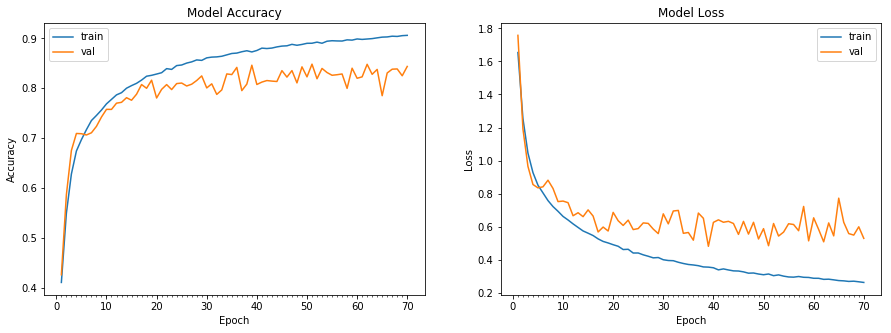

Accuracy on test data is: 84.37


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

#Mounting google drive in colab to save model and misclassified image
from google.colab import drive
drive.mount('/content/gdrive')

#We will save our trained best model on disk .. We will store the model in the HDF5 file format

filepath=F"/content/gdrive/My Drive/weights.best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#Adding Image augmentation
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='constant',
        cval=0)

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 70, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))

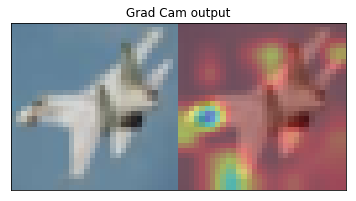

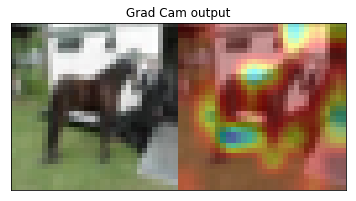

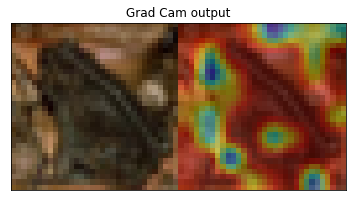

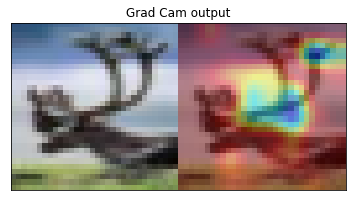

In [0]:


from keras.models import load_model
from keras.preprocessing.image import save_img
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import save_img
import cv2

filepath=F"/content/gdrive/My Drive/weights.best.hdf5"

#Load the best saved model and create predictions on the test set

#test_iterator = datagen.flow(test_features, test_labels, batch_size=64,shuffle=False)

cfar_model = load_model(filepath)

images = [10,20,30,40]
#predict = cfar_model.predict_generator(test_iterator,steps=len(test_iterator))

for i in images:


  
  x = image.img_to_array(test_features[i])
  x = np.expand_dims(x, axis=0)

  preds = cfar_model.predict(x)


  class_idx = np.argmax(preds[0])
  class_output = cfar_model.output[:, class_idx]
  last_conv_layer = cfar_model.get_layer("conv2d_7")

  img = test_features[i]
  img = img.copy()
  x = [img]

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([cfar_model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)


  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  img = np.uint8(255 * img)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  
  concat = np.concatenate((img, superimposed_img), axis=1)
  plt.imshow(concat)
  
  plt.title( "Grad Cam output")

  plt.xticks([])

  plt.yticks([])
  
  plt.show()

 








#Cutout implementation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=70)`
W0629 19:32:11.373576 139716688091008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/70
390/390 [==============================] - 34s 87ms/step - loss: 1.7556 - acc: 0.3720 - val_loss: 1.4706 - val_acc: 0.4848

Epoch 00001: val_acc improved from -inf to 0.48480, saving model to /content/gdrive/My Drive/weights2.best.hdf5
Epoch 2/70
390/390 [==============================] - 29s 74ms/step - loss: 1.3966 - acc: 0.4937 - val_loss: 1.2384 - val_acc: 0.5728

Epoch 00002: val_acc improved from 0.48480 to 0.57280, saving model to /content/gdrive/My Drive/weights2.best.hdf5
Epoch 3/70
390/390 [==============================] - 29s 73ms/step - loss: 1.1998 - acc: 0.5686 - val_loss: 1.0509 - val_acc: 0.6354

Epoch 00003: val_acc improved from 0.57280 to 0.63540, saving model to /content/gdrive/My Drive/weights2.best.hdf5
Epoch 4/70
390/390 [==============================] - 28s 72ms/step - loss: 1.0601 - acc: 0.6245 - val_loss: 1.0041 - val_

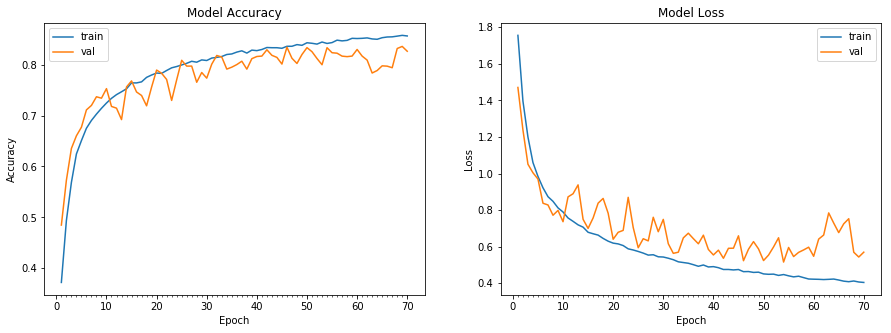

NameError: ignored

In [14]:


from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser


#Mounting google drive in colab to save model and misclassified image
from google.colab import drive
drive.mount('/content/gdrive')

#We will save our trained best model on disk .. We will store the model in the HDF5 file format

filepath=F"/content/gdrive/My Drive/weights2.best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#Adding Image augmentation
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='constant',
        cval=0,
         preprocessing_function=get_random_eraser(v_l=0, v_h=1))

# train the model

# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 70, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpoint])

# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))

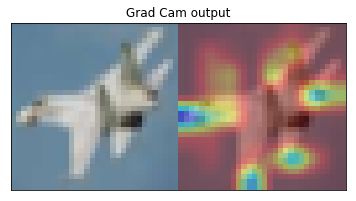

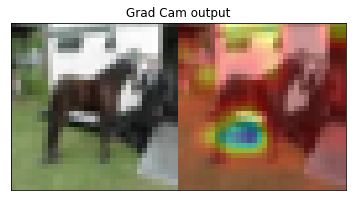

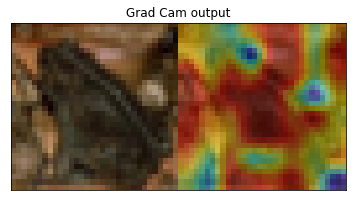

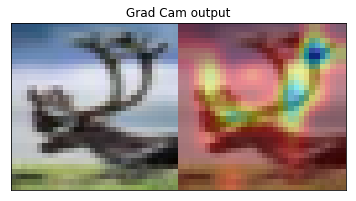

In [15]:
from keras.models import load_model
from keras.preprocessing.image import save_img
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import save_img
import cv2

filepath=F"/content/gdrive/My Drive/weights2.best.hdf5"

#Load the best saved model and create predictions on the test set

#test_iterator = datagen.flow(test_features, test_labels, batch_size=64,shuffle=False)

cfar_model = load_model(filepath)

images = [10,20,30,40]
#predict = cfar_model.predict_generator(test_iterator,steps=len(test_iterator))

for i in images:


  
  x = image.img_to_array(test_features[i])
  x = np.expand_dims(x, axis=0)

  preds = cfar_model.predict(x)


  class_idx = np.argmax(preds[0])
  class_output = cfar_model.output[:, class_idx]
  last_conv_layer = cfar_model.get_layer("conv2d_7")

  img = test_features[i]
  img = img.copy()
  x = [img]

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([cfar_model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)


  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  img = np.uint8(255 * img)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  
  concat = np.concatenate((img, superimposed_img), axis=1)
  plt.imshow(concat)
  
  plt.title( "Grad Cam output")

  plt.xticks([])

  plt.yticks([])
  
  plt.show()
